# Лабораторная работа №1. Градиентные методы оптимизации

In [86]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np

from IPython.display import HTML

## Функция Швефеля
### x,y от -10 до 10
### глобальный экстремум 0
### точка глобального экстремума (0, 0)

In [3]:
def func_Shvefel(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2

def grad_Shvefel(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])

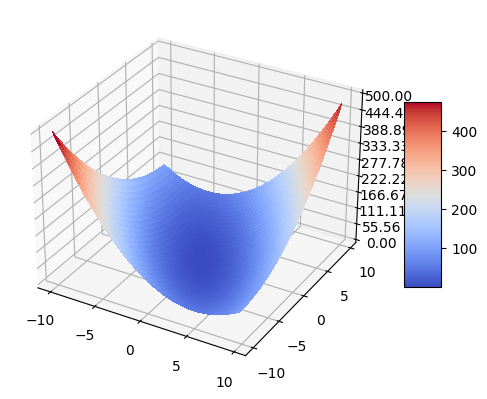

In [4]:
# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func_Shvefel(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [5]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [77]:
%matplotlib notebook

In [105]:
def plot_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000):
    x1, z1, history = my_GD(f, df, x0, lr, max_iter)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    # Plot the surface.
    X = np.arange(-10, 10, 0.25)
    Y = np.arange(-10, 10, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = f(np.array([X, Y]))
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    #xx = ax.scatter(x0[0], x0[1], func_Shvefel(x0), c = 'black')
    
    line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5, color = 'black')
    point, = ax.plot([], [], [], '*', color = 'black')
    
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([x0[0]], [x0[1]])
    point.set_3d_properties([func_Shvefel(x0)])
    
    def update_point(i):
        i = i + 1
        print(i)
        #print(history[:2,0])
        #xx.set_data(history[i][0], history[i][1], history[i][2], c = 'black')
        # Animate line
        line.set_data(history[:i, 0], history[:i, 1])
        line.set_3d_properties(history[:i, 2])

        # Animate points
        point.set_data([history[i][0]], [history[i][1]])
        point.set_3d_properties([history[i][2]])
        return line, point
        
    ani = animation.FuncAnimation(fig, update_point, frames=range(len(history)),interval = 50, blit=True)
    HTML(anim.to_html5_video())
    return x1[0], x1[1], z1

In [106]:
my_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

(array([-0.03741523,  0.06053912]),
 0.0019346137822891848,
 array([[ 1.00000000e+01,  1.00000000e+01,  5.00000000e+02],
        [ 9.94000000e+00,  9.96000000e+00,  4.94813600e+02],
        [ 9.88032000e+00,  9.92020000e+00,  4.89681316e+02],
        ...,
        [-3.74724642e-02,  6.06317209e-02,  1.94053674e-03],
        [-3.74438378e-02,  6.05854024e-02,  1.93757300e-03],
        [-3.74152333e-02,  6.05391192e-02,  1.93461378e-03]]))

<IPython.core.display.Javascript object>


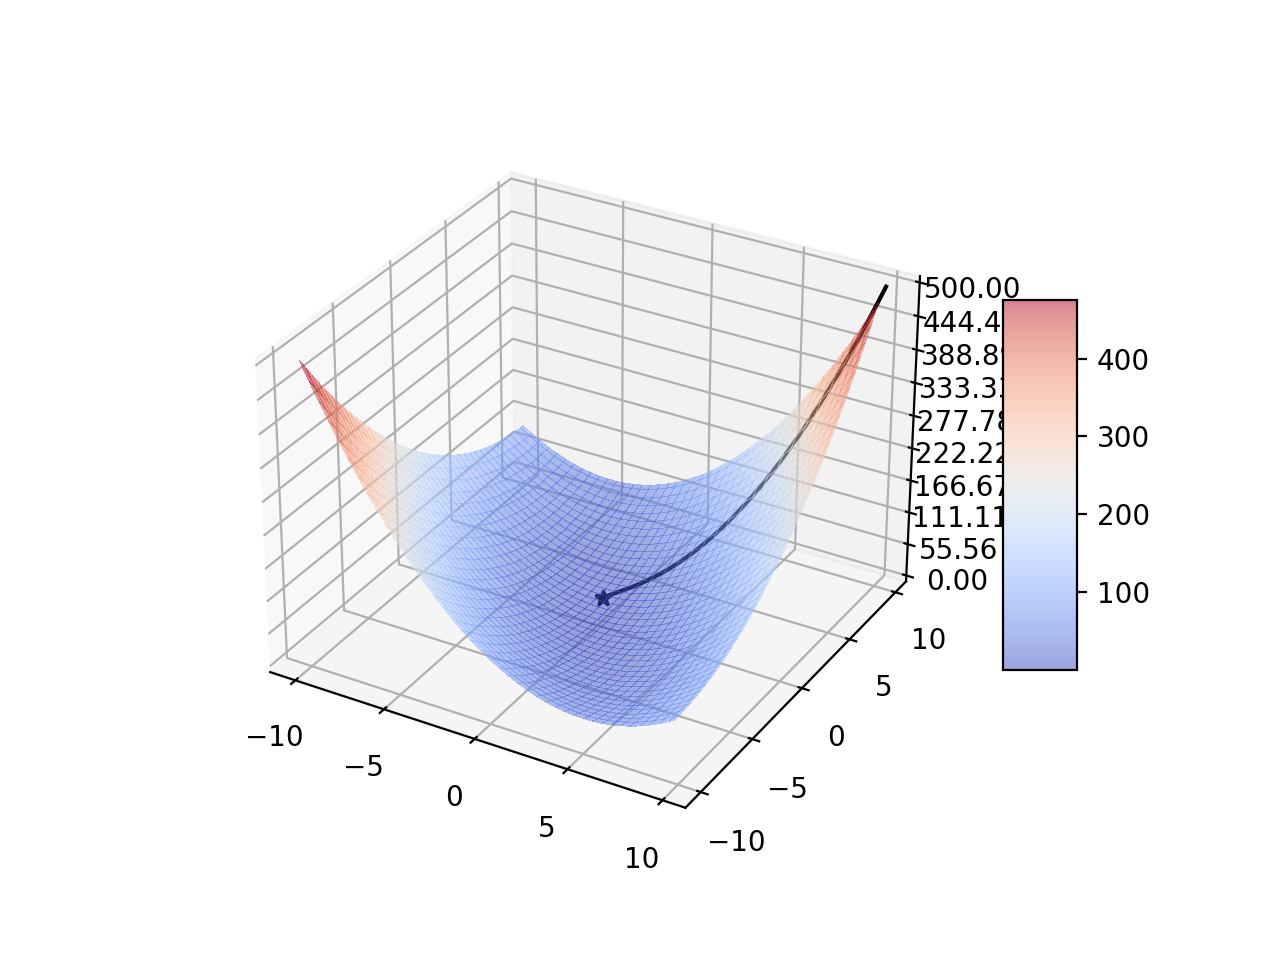

/var/folders/x4/7f4hrz657630_vzq5rhyrmbw0000gp/T/ipykernel_6193/1988721159.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5, color = 'black')


NameError: name 'anim' is not defined

In [107]:
plot_GD(func_Shvefel, grad_Shvefel, np.array([10, 10]), max_iter = 5000)

In [12]:
def test_func1(x: np.ndarray) -> np.float64:
    return np.sum(np.square(x))

def test_func1_grad(x: np.ndarray) -> np.float64:
    return 2 * x

In [13]:
my_GD(test_func1, test_func1_grad, np.array([100, 100]))

(array([2.02028609e-07, 2.02028609e-07]),
 8.16311177282221e-14,
 array([[1.00000000e+02, 1.00000000e+02, 2.00000000e+04],
        [9.98000000e+01, 9.98000000e+01, 1.99200800e+04],
        [9.96004000e+01, 9.96004000e+01, 1.98404794e+04],
        ...,
        [2.02839154e-07, 2.02839154e-07, 8.22874450e-14],
        [2.02433476e-07, 2.02433476e-07, 8.19586244e-14],
        [2.02028609e-07, 2.02028609e-07, 8.16311177e-14]]))

In [14]:
def impulse_method(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, gamma: float = 0.9) -> tuple[np.ndarray, np.float32, np.ndarray]:
    if (gamma > 1 or gamma < 0):
        print('incorrect gamma. Set default gamma = 0.9')
        gamma = 0.9
    
    x_old = x0.copy()
    u = 0
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        u = gamma * u + lr * df(x_old)
        x_new = x_old - u
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [15]:
impulse_method(test_func1, test_func1_grad, np.array([100, 100]))

(array([4.01541435e-115, 4.01541435e-115]),
 3.2247104773461822e-229,
 array([[1.00000000e+002, 1.00000000e+002, 2.00000000e+004],
        [9.98000000e+001, 9.98000000e+001, 1.99200800e+004],
        [9.94204000e+001, 9.94204000e+001, 1.97688319e+004],
        ...,
        [4.23686672e-115, 4.23686672e-115, 3.59020792e-229],
        [4.12465458e-115, 4.12465458e-115, 3.40255508e-229],
        [4.01541435e-115, 4.01541435e-115, 3.22471048e-229]]))

In [ ]:
def 